# Group No. 72

**Group Members**

1. Harshali Choudhari (2021sc04422) - 100% contribution
2. Ruddaraju Neeraja (2021sc04578)  - 100% contribution
3. Jatinder Singh (2021sc04680)     - 100% contribution
4. Rahul Sanganna Chanda (2021sc04669)  - 100% contribution

**Import libraries**

In [1]:
import pandas as pd
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

**1. Download the file and set it as a Dataframe**

In [2]:
input_Data = pd.read_csv("movie_review.csv")
print(input_Data.shape)

(64720, 6)


**2. Remove punctuations, special characters and stopwords from the text column. Convert the text to lower case.**

In [3]:
def cleaned_text(text):
    # Tokenize the text
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    # Remove punctuations
    tokens_remove_punct = [token.text for token in doc if not token.is_punct]
    
    # Remove special characters
    tokens_spcl_char = [token for token in tokens_remove_punct if token.isalnum()]

    # Convert to lowercase and remove stopwords
    processed_text = [token.lower() for token in tokens_spcl_char if token.lower() not in STOP_WORDS]

    return ' '.join(processed_text)


In [4]:
# creating the cleaned_text as column with removal of special chars, punctuations and stopwords
input_Data["cleaned_text"] = input_Data['text'].apply(cleaned_text)

C:\Users\rahul\AppData\Local\Temp\ipykernel_19612\187692587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_Data["cleaned_text"] = input_Data['text'].apply(cleaned_text)


**3. Create two objects Xand y. X will be the 'text' column dataframe and y will be the “tag” column. Vectorize the data using TF-IDF and CountVectorizer embedding techniques and display the vectors. (2 Marks)**

In [5]:
x = input_Data["cleaned_text"]
y = input_Data["tag"]

In [6]:
# Creating Vector using TF-IDF embedding techniques
tfidf_vector = TfidfVectorizer()
tfidf_vectors = tfidf_vector.fit_transform(x)

print(tfidf_vectors.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.25978019 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.30211285]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [7]:
# Creating Vector using Count Vectorizer embedding techniques
count_vectorizer = CountVectorizer()
count_vectors = count_vectorizer.fit_transform(x)

print(count_vectors.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**4. Implement Skip-Gram and CBOW using window sizes as [1,3,5], Display the embeddings using a visualization and write your observations.**

In [8]:
sentences = [text for text in x]
window_sizes = [1, 3, 5]
embedding_skip_gram = []
embedding_cbow = []

In [9]:
for window in window_sizes:
    # Using skip - gram
    model_sg = Word2Vec(sentences, vector_size=10, window=window, min_count=1, sg=1)
    
    # Using CBOW
    model_cbow = Word2Vec(sentences, vector_size=10, window=window, min_count=1, sg=0)
    embedding_skip_gram.append(model_sg.wv.vectors)
    embedding_cbow.append(model_cbow.wv.vectors)

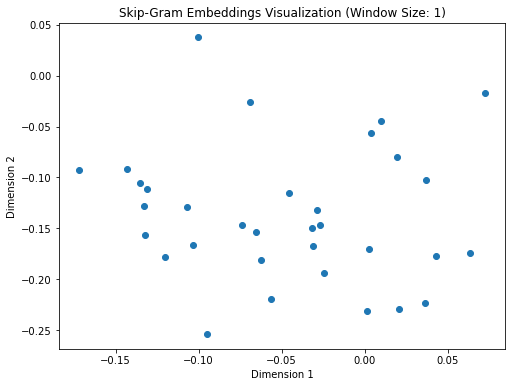

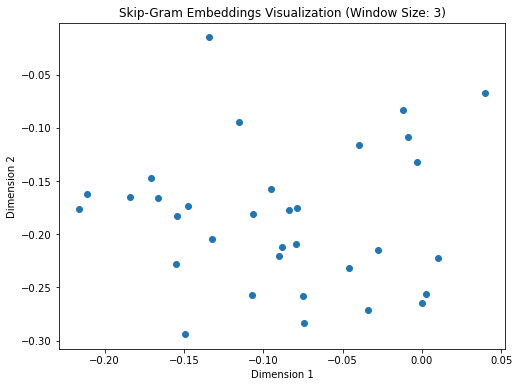

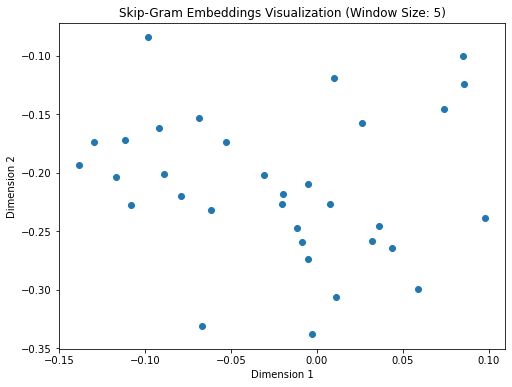

In [10]:
for index, window in enumerate(window_sizes):
    plt.figure(figsize=(8, 6))
    plt.scatter(embedding_skip_gram[index][:, 0], embedding_skip_gram[index][:, 1])
    plt.title(f'Skip-Gram Embeddings Visualization (Window Size: {window})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

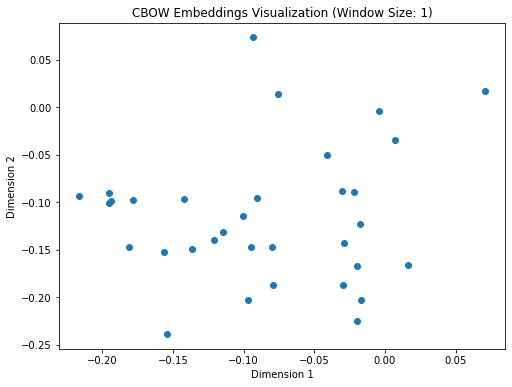

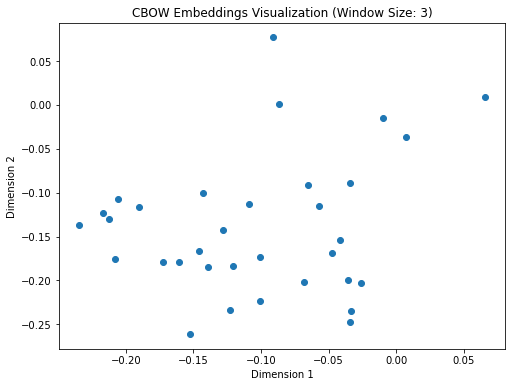

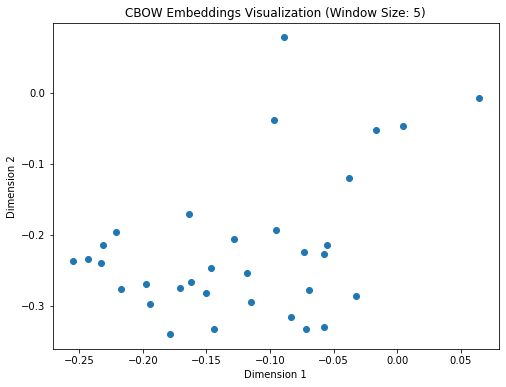

In [11]:
for index, window in enumerate(window_sizes):
    plt.figure(figsize=(8, 6))
    plt.scatter(embedding_cbow[index][:, 0], embedding_cbow[index][:, 1])
    plt.title(f'CBOW Embeddings Visualization (Window Size: {window})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

**5. Explain the importance of vector size in Word2Vec embeddings?**

Word embeddings is a technique where individual words are transformed into a numerical representation of the word (a vector). 
The vectors try to capture various characteristics of that word with regard to the overall text. 
These characteristics can include the semantic relationship of the word, definitions, context, etc. With these numerical representations, you can do many things like identify similarity or dissimilarity between words.